This notebook is designed for the gather raw data step of the workflow.

We will use the python package scirate to help extract info from scirate, and scholarly to get info from google scholar. 

In [1]:
import pandas as pd
import numpy as np
import scirate
import json
import matplotlib.pyplot as plt
from scholarly import scholarly
from scirate.client import ScirateClient
client = ScirateClient()
from scirate.category import ScirateCategory

from datetime import datetime, timedelta
from dateutil.parser import parse

def date_span(start_date_str, end_date_str, every = 1):

    start_date = parse(start_date_str)
    end_date = parse(end_date_str)

    date_list = [(start_date + timedelta(days=i)).strftime("%m-%d-%Y") for i in range((end_date - start_date).days + 1)]
    date_list = [date_list[i] for i in range(len(date_list)) if i % every == 0]
    
    return np.array(date_list)

In [3]:

category = client.category("quant-ph", "09-07-2017")

Exploring scirate a bit

In [5]:
date_span_list = date_span("01-01-2012", "08-09-2023")
date_list = np.random.choice(date_span_list, size=100)

In [6]:
category = client.category("quant-ph", date_list[0])
# this gives us good info to start from, and pull others into it
print(category.arxiv_ids)
print(category.scites)
print(category.co_authors)

['1804.03719', '1804.03680', '1804.03730', '1804.04119', '1804.04073', '1804.03924', '1804.04092', '1804.04042', '1804.03800', '1804.03872', '1804.03865', '1804.04069', '1804.04057', '1804.04045', '1804.04026', '1804.03971', '1804.03916', '1804.03878', '1804.03861', '1804.03841', '1804.03840', '1804.03814', '1804.03804', '1804.03792', '1804.03790', '1804.03772', '1804.03749', '1804.03742', '1804.03726', '1804.03721', '1804.04015', '1804.03755', '1804.04009', '1804.03992']
[68, 24, 23, 8, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[['Abhijith J.', 'Adetokunbo Adedoyin', 'John Ambrosiano', 'Petr Anisimov', 'William Casper', 'Gopinath Chennupati', 'Carleton Coffrin', 'Hristo Djidjev', 'David Gunter', 'Satish Karra', 'Nathan Lemons', 'Shizeng Lin', 'Alexander Malyzhenkov', 'David Mascarenas', 'Susan Mniszewski', 'Balu Nadiga', "Daniel O'Malley", 'Diane Oyen', 'Scott Pakin', 'Lakshman Prasad', 'et al (14)'], ['Edward Grant', 'Marcello Benedetti

In [17]:
scites = np.array(category.scites)


array([ 0,  1,  2,  3,  8, 23, 24, 68])

In [40]:
# more info on a paper-by-paper level
paper = client.paper(category.arxiv_ids[0])
print(paper.scitors)
print(paper.abstract)
print(paper.title)

['Abdulah', 'Andreas Wendt', 'Aram Harrow', 'Bin Cheng', 'Chao-Hua Yu', 'Christoph Hirche', 'David Elkouss', 'Elizabeth Crosson', 'Florian Speelman', 'Gali Galo', 'Haomu Yuan', 'Hrant Gharibyan', 'Kishor Bharti', 'Leonard Wossnig', 'Luca Innocenti', 'Nicolas Delfosse', 'Noon van der Silk', 'Oscar Higgott', 'Peter Wittek', 'Roger Zhao', 'Shenggen Zheng (Timothy)', 'Shih-Han Hung', 'Shijie Pan', 'Srinivasan', 'Stephen Jordan', 'Tobias H', 'Vlad Gheorghiu', 'Will Kirby', 'Woong-seon Yoo', 'Xavier Bonet-Monroig', 'Xun Gao', 'Yu Luo', 'Zoltán Zimborás']
We present a quantum algorithm for portfolio optimization. We discuss the market data input, the processing of such data via quantum operations, and the output of financially relevant results. Given quantum access to the historical record of returns, the algorithm determines the optimal risk-return tradeoff curve and allows one to sample from the optimal portfolio. The algorithm can in principle attain a run time of ${\rm poly}(\log(N))$, wh

In [48]:
# more info on an author-by-author level
first_name = category.co_authors[0][0].split(" ")[0]
last_name = category.co_authors[0][0].split(" ")[-1]
author = client.author(first_name, last_name, category='quant-ph')
print(author.arxiv_ids)
print(author.co_authors)

['2307.10560', '2305.09374', '2305.02019', '2304.02262', '2303.01805', '2212.13815', '2209.08867', '2208.14749', '2203.04924', '2111.15332', '2109.01014', '2108.11670', '2106.07634', '2009.13288', '2006.00841', '2003.11777', '2002.06003', '1909.07344', '1907.05378', '1902.10394', '1811.03975', '1809.02579', '1806.11463', '1805.00109', '1804.00281', '1803.10731', '1803.07039', '1801.06565', '1712.07288', '1712.06729', '1710.07405', '1710.03599', '1612.01789', '1611.09347', '1609.08170', '1607.05404', '1307.0471', '1307.0401', '1307.0411', '1106.1683', '1104.2943', '1101.0010', '1012.3451', '1011.3809', '0908.1961', '0901.0534', '0808.2680', '0807.0929', '0806.4725', '0805.2741', 'quant-ph/0612165']
[['Po-Wei Huang', 'Patrick Rebentrost'], ['Naixu Guo', 'Patrick Rebentrost'], ['Lukas Mouton', 'Florentin Reiter', 'Ying Chen', 'Patrick Rebentrost'], ['Debbie Lim', 'João F. Doriguello', 'Patrick Rebentrost'], ['Yangyang Liu', 'Zhen Chen', 'Chang Shu', 'Patrick Rebentrost', 'Yaguang Liu', 'S

That seems to be all we can get with scirate. Exploring scholarly

In [55]:
# Retrieve the author's data, fill-in, and print
# Get an iterator for the author results
search_query = scholarly.search_author('Steven A Cholewiak')
# Retrieve the first result from the iterator
first_author_result = next(search_query)
scholarly.pprint(first_author_result)

# Retrieve all the details for the author
author = scholarly.fill(first_author_result )
scholarly.pprint(author)

# Take a closer look at the first publication
first_publication = author['publications'][0]
first_publication_filled = scholarly.fill(first_publication)
scholarly.pprint(first_publication_filled)

# Print the titles of the author's publications
publication_titles = [pub['bib']['title'] for pub in author['publications']]
print(publication_titles)

# Which papers cited that publication?
citations = [citation['bib']['title'] for citation in scholarly.citedby(first_publication_filled)]
print(citations)

b"{'affiliation': 'Vision Scientist at Google LLC',\n 'citedby': 527,\n 'email_domain': '@google.com',\n 'filled': False,\n 'interests': ['Depth Cues',\n               '3D Shape',\n               'Shape from Texture & Shading',\n               'Naive Physics',\n               'Haptics'],\n 'name': 'Steven A. Cholewiak, PhD',\n 'scholar_id': '4bahYMkAAAAJ',\n 'source': 'SEARCH_AUTHOR_SNIPPETS',\n 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=4bahYMkAAAAJ'}"
b'{\'affiliation\': \'Vision Scientist at Google LLC\',\n \'citedby\': 527,\n \'citedby5y\': 357,\n \'cites_per_year\': {2008: 3,\n                    2009: 5,\n                    2010: 8,\n                    2011: 9,\n                    2012: 22,\n                    2013: 17,\n                    2014: 16,\n                    2015: 18,\n                    2016: 35,\n                    2017: 32,\n                    2018: 29,\n                    2019: 61,\n                    2020: 66,\n      

In [60]:
# author by author info
for key in author:
    print(key)


container_type
filled
source
scholar_id
url_picture
name
affiliation
email_domain
interests
citedby
organization
homepage
citedby5y
hindex
hindex5y
i10index
i10index5y
cites_per_year
coauthors
publications
public_access


In [64]:
print(author['citedby'])
print(author['citedby5y'])
print(author['hindex'])
print(author['hindex5y'])
print(author['cites_per_year'])

527
357
12
11
{2008: 3, 2009: 5, 2010: 8, 2011: 9, 2012: 22, 2013: 17, 2014: 16, 2015: 18, 2016: 35, 2017: 32, 2018: 29, 2019: 61, 2020: 66, 2021: 81, 2022: 73, 2023: 45}


In [65]:
for key in first_publication_filled:
    print(key)

container_type
source
bib
filled
author_pub_id
num_citations
citedby_url
cites_id
pub_url
url_related_articles
cites_per_year


Okay, lets compile some data

In [12]:
np.random.seed(2140)
no_dates = 10
date_span_list = date_span("01-01-2012", "08-09-2023")
date_list = np.random.choice(date_span_list, size=10)

data = {"arxiv_id": [],
        "co_authors":[],
        "scites":[]}

for i, date in enumerate(date_list):
        category = client.category("quant-ph", date)
        # this gives us good info to start from, and pull others into it
        arxiv_ids = category.arxiv_ids
        scites = category.scites
        co_authors = category.co_authors

        unique = np.unique(scites)
        unique_pos = [np.where(scites == unique_val)[0][0] for unique_val in unique]

        unique_scites = [scites[x] for x in unique_pos]
        unique_arxiv_ids = [arxiv_ids[x] for x in unique_pos]
        unique_co_authors = [co_authors[x] for x in unique_pos]

        data["arxiv_id"]+=unique_arxiv_ids
        data["co_authors"]+=unique_co_authors
        data["scites"] += unique_scites

In [21]:
data["citedby"] = []
data["citedby5y"] = []
data["hindex"] = []
data["hindex5y"] = []
data["cites_per_year"] = []

# add co author data using scholarly
for i, co_author_list in enumerate(data["co_authors"]):

    co_author_citedby = []
    co_author_citedby5y = []
    co_author_hindex = []
    co_author_hindex5y = []
    co_author_cites_per_year = []

    for j, author in enumerate(co_author_list):

        try:
            search_query = scholarly.search_author(author)
            # Retrieve the first result from the iterator
            first_author_result = next(search_query)
            # Retrieve all the details for the author
            author_details = scholarly.fill(first_author_result)

            co_author_citedby.append(author_details['citedby'])
            co_author_citedby5y.append(author_details["citedby5y"])
            co_author_hindex.append(author_details['hindex'])
            co_author_hindex5y.append(author_details["hindex5y"])
            co_author_cites_per_year.append(author_details["cites_per_year"])

        except Exception as e:
            co_author_citedby.append(np.NaN)
            co_author_citedby5y.append(np.NaN)
            co_author_hindex.append(np.NaN)
            co_author_hindex5y.append(np.NaN)
            co_author_cites_per_year.append(np.NaN)
            print(e)

        finally:
            print("round: " + str(i) + "/" + str(len(data["co_authors"])))
            print("subround: " + str(j) + "/" + str(len(co_author_list)))

    data["citedby"].append(co_author_citedby)
    data["citedby5y"].append(co_author_citedby5y)
    data["hindex"].append(co_author_hindex)
    data["hindex5y"].append(co_author_hindex5y)
    data["cites_per_year"].append(co_author_cites_per_year)

round: 0/43
subround: 0/12
round: 0/43
subround: 1/12

round: 0/43
subround: 2/12
round: 0/43
subround: 3/12
round: 0/43
subround: 4/12
round: 0/43
subround: 5/12
round: 0/43
subround: 6/12

round: 0/43
subround: 7/12
round: 0/43
subround: 8/12
round: 0/43
subround: 9/12
round: 0/43
subround: 10/12

round: 0/43
subround: 11/12
round: 1/43
subround: 0/7
round: 1/43
subround: 1/7
round: 1/43
subround: 2/7
round: 1/43
subround: 3/7
round: 1/43
subround: 4/7
round: 1/43
subround: 5/7
round: 1/43
subround: 6/7
round: 2/43
subround: 0/4
round: 2/43
subround: 1/4
round: 2/43
subround: 2/4

round: 2/43
subround: 3/4

round: 3/43
subround: 0/2
round: 3/43
subround: 1/2
round: 4/43
subround: 0/2
round: 4/43
subround: 1/2
round: 5/43
subround: 0/3
round: 5/43
subround: 1/3
round: 5/43
subround: 2/3


KeyboardInterrupt: 

In [31]:
search_query = scholarly.search_author(author)
first_author_result = next(search_query)
author_details = scholarly.fill(first_author_result)

In [32]:
author_details['name']

'Sankar Das Sarma'

Scholarly is way too slow. On searching for something else, found nothing fast enough to scrape scholar in the way I want. Will have to rely only on scirate data, which should be fine.

In [25]:
np.random.seed(2140)
no_dates = 5000
date_span_list = date_span("01-01-2014", "08-09-2023")
date_list = np.random.choice(date_span_list, size=no_dates)

data = {"arxiv_id": [],
        "co_authors":[],
        "scites":[]}

for i, date in enumerate(date_list):
        category = client.category("quant-ph", date)
        # this gives us good info to start from, and pull others into it
        arxiv_ids = category.arxiv_ids
        scites = category.scites
        co_authors = category.co_authors

        unique = np.unique(scites)
        unique_pos = [np.random.choice(np.where(scites == unique_val)[0]) for unique_val in unique]

        unique_scites = [scites[x] for x in unique_pos]
        unique_arxiv_ids = [arxiv_ids[x] for x in unique_pos]
        unique_co_authors = [co_authors[x] for x in unique_pos]

        data["arxiv_id"] += unique_arxiv_ids
        data["co_authors"] += unique_co_authors
        data["scites"] += unique_scites

data["scitors"] = []
data["abstract"] = []
data["title"] = []

for id in data["arxiv_id"]:
        try: 
                paper = client.paper(id)
                data["scitors"].append(paper.scitors)
                data["abstract"].append(paper.abstract)
                data["title"].append(paper.title)
        except Exception as e: 
                data["scitors"].append(np.NaN)
                data["abstract"].append(np.NaN)
                data["title"].append(np.NaN)
                print(e)

with open("scirate_data.json", "w") as json_file:
    json.dump(data, json_file)

In [2]:
with open("scirate_data.json", "r") as json_file:
    data_import = json.load(json_file)

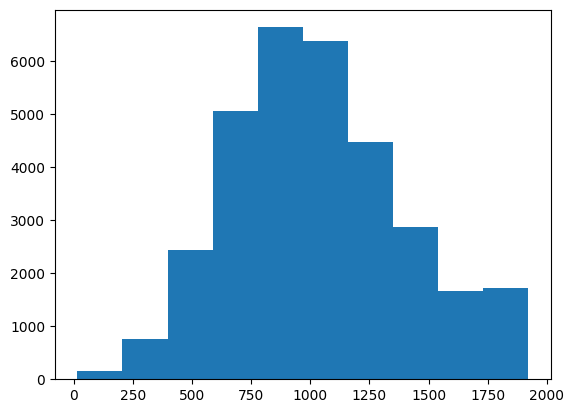

In [10]:
plt.hist([len(abs) for abs in data_import['abstract']])
plt.show()

I might need to apply a little adjustment to normalize the scites by date, since the site grew in popularity over the time range I'm sampling from. Luckily the arxiv number has the YYMM which will be sufficient! Our 0 time will be Jan 1 2014

In [11]:
df = pd.read_json("scirate_data.json")
df.head()

,arxiv_id,co_authors,scites,scitors,abstract,title
0,1407.4178,"[Jie Xu, Xinyu Zhao, Jun Jing, Lian-Ao Wu, Tin...",0,[],Two perturbation methods for the non-Markovian...,Perturbation Methods for Non-Markovian Quantum...
1,1407.4250,"[R. Carlone, R. Figari, C. Negulescu]",1,[Jean-Marc Sparenberg],"We define and investigate, via numerical analy...",A model of a quantum particle in a quantum env...
2,1407.4343,[M. M. Taddei],2,"[Fernando de Melo, Kavan]",Quantum speed limits are relations yielding lo...,Quantum Speed Limits for General Physical Proc...
3,1407.4133,"[Yuxiang Yang, Giulio Chiribella, Gerardo Adesso]",6,"[Juan Miguel Arrazola, Kavan, Marco Piani, Mic...",Quantum technology promises revolutionary adva...,Certifying quantumness: Benchmarks for the opt...
4,1407.4419,"[Daniel Shaffer, Claudio Chamon, Alioscia Hamm...",11,"[Aram Harrow, Fernando de Melo, John Goold, Ka...",We show that in a quantum system evolving unit...,Irreversibility and Entanglement Spectrum Stat...


Let's add some necessary features

In [21]:
df['date_YY_MM'] = df['arxiv_id'].apply(lambda x: str(x)[0:2] + "-" + str(x)[2:4])

In [28]:
df['date_M'] = df['arxiv_id'].apply(lambda x: (int(str(x)[0:2]) - 14) * 12 + int(str(x)[2:4]) - 1)
df['date_Y'] = df['arxiv_id'].apply(lambda x: (int(str(x)[0:2]) - 14))

<Axes: xlabel='date_M'>

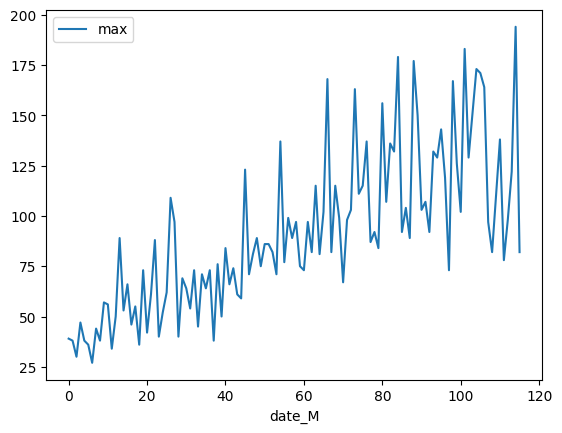

In [27]:
df.groupby('date_M').agg([np.max])['scites'].plot()

In [45]:
scale_factors = np.max(df.groupby('date_Y')['scites'].agg([np.mean])['mean']) / df.groupby('date_Y')['scites'].agg([np.mean])

In [54]:
df = df.merge(scale_factors, on='date_Y')

In [57]:
df = df.rename(columns={'mean':'scites_scale_factor'})

In [58]:
df['scites_scaled'] = df['scites'] * df['scites_scale_factor']

KeyboardInterrupt: 

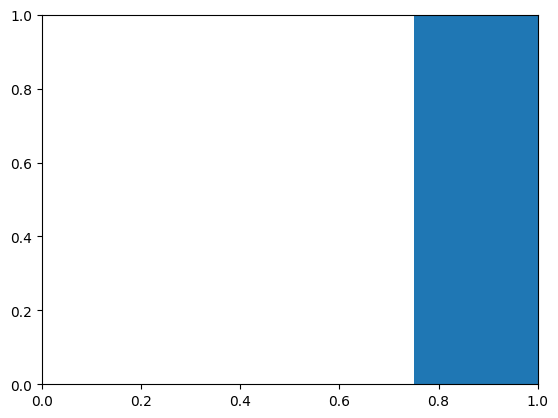

In [64]:
df.plot(kind='scatter', x='date_M', y='scites_scaled')
plt.show()